In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')



Loading Data

In [21]:
df = pd.read_csv("/content/Customer_churn_analysis.csv")
df.head(3)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN


# Checking the data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6687 non-null   object 
 1   Churn Label                        6687 non-null   object 
 2   Account Length (in months)         6687 non-null   int64  
 3   Local Calls                        6687 non-null   int64  
 4   Local Mins                         6687 non-null   float64
 5   Intl Calls                         6687 non-null   float64
 6   Intl Mins                          6687 non-null   float64
 7   Intl Active                        6687 non-null   object 
 8   Intl Plan                          6687 non-null   object 
 9   Extra International Charges        6687 non-null   float64
 10  Customer Service Calls             6687 non-null   int64  
 11  Avg Monthly GB Download            6687 non-null   int64

No Null Value


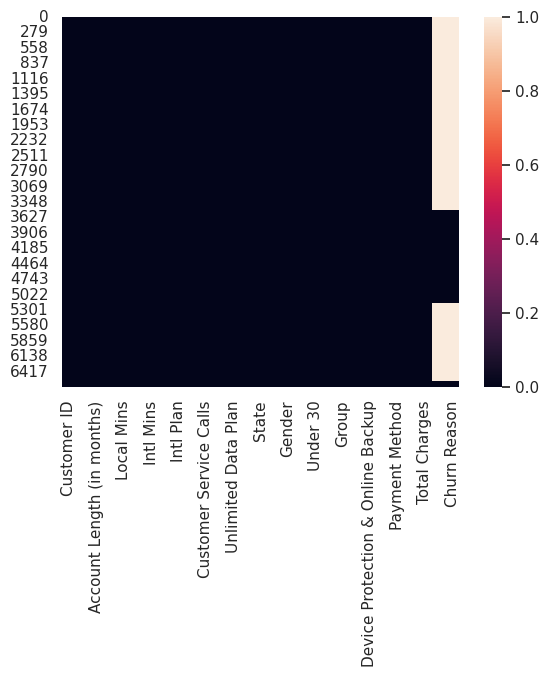

In [23]:
# Heatmap for check Null Values
sns.heatmap(df.isnull())
print("No Null Value")
#There is only null values in Churn Reason

In [24]:
import warnings
warnings.filterwarnings('ignore')
print(f"Columns : {df.shape[0]} \nRows : {df.shape[1]}")

Columns : 6687 
Rows : 29


In [25]:
df.describe()

,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Extra International Charges,Customer Service Calls,Avg Monthly GB Download,Extra Data Charges,Age,Number of Customers in Group,Monthly Charge,Total Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097524,130.070624,33.641783,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592369,243.527828,76.346828,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.400000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,585.800000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [26]:
df.describe(include = "object").transpose()

,count,unique,top,freq
Customer ID,6687,6687,4444-BZPU,1
Churn Label,6687,2,No,4891
Intl Active,6687,2,No,4116
Intl Plan,6687,2,no,6036
Unlimited Data Plan,6687,2,Yes,4494
State,6687,51,WV,213
Phone Number,6687,6677,359-9794,2
Gender,6687,3,Male,3379
Under 30,6687,2,No,5400
Senior,6687,2,No,5460


In [27]:
df.head(5)

,Customer ID,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,4444-BZPU,No,1,3,8.0,0.0,0.0,No,no,0.0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,5676-PTZX,No,33,179,431.3,0.0,0.0,No,no,0.0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,8532-ZEKQ,No,44,82,217.6,0.0,0.0,No,yes,0.0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,1314-SMPJ,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,2956-TXCJ,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


# EDA

In [28]:
print(f"Total Number of Customers: {df['Customer ID'].nunique()}")
print(f"Total NUmber of Churned Customers: {df['Churn Label'].value_counts()[1]}")
print(f"Rate of Churned Customers : {(df['Churn Label'].value_counts()[1]/df['Customer ID'].nunique()*100).round(2)} %")

Total Number of Customers: 6687
Total NUmber of Churned Customers: 1796
Rate of Churned Customers : 26.86 %


In [29]:
reason=df[df['Churn Label'] == 'Yes'][['Churn Label','Churn Reason','Churn Category']]

In [30]:
#Find Churn Reason
churn_reason=reason['Churn Reason'].value_counts().reset_index()
churn_reason.head(3)

,Churn Reason,count
0,Competitor made better offer,303
1,Competitor had better devices,297
2,Attitude of support person,203


In [31]:
#according to pareto principle 80% problems comes from 20% reasons. These are the churn reasons.


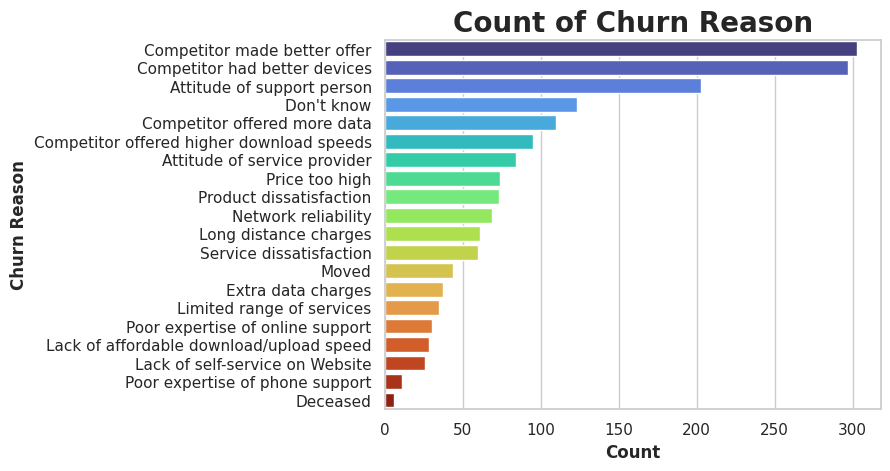

In [32]:
## Create barplot which Will Show Churn Reason
sns.barplot(x='count',y='Churn Reason',data=churn_reason,palette='turbo')
plt.title('Count of Churn Reason',fontweight='bold',fontsize=20)
plt.ylabel('Churn Reason',fontweight='bold',fontsize=12)
plt.xlabel('Count',fontweight='bold',fontsize=12)
plt.show()

In [33]:
churned = df[df['Churn Label'] == 'Yes'].groupby('Account Length (in months)')['Churn Label'].count().reset_index(name='Churned')
retained = df[df['Churn Label'] == 'No'].groupby('Account Length (in months)')['Churn Label'].count().reset_index(name='Not Churned')
merged_df = pd.merge(churned, retained, on='Account Length (in months)', how='outer')
merged_df.head()


,Account Length (in months),Churned,Not Churned
0,1,367.0,224
1,2,117.0,108
2,3,82.0,106
3,4,80.0,81
4,5,60.0,78


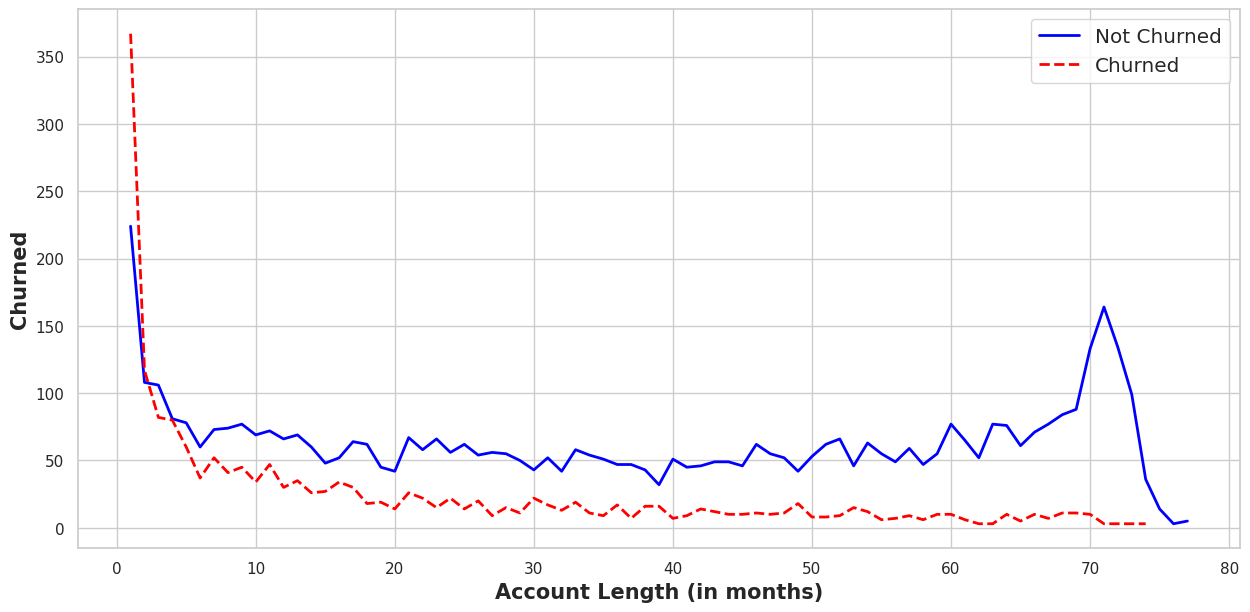

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Account Length (in months)',y='Not Churned',data=merged_df,label='Not Churned',linewidth=2,color='blue')
sns.lineplot(x='Account Length (in months)',y='Churned',data=merged_df,label='Churned',linestyle='--',linewidth=2,color='red')
plt.ylabel('Churned',fontweight='bold',fontsize=15)
plt.xlabel('Account Length (in months)',fontweight='bold',fontsize=15)
plt.legend(fontsize='large')
plt.show()

In [35]:
reason['Churn Category'].value_counts()
labels=reason['Churn Category'].value_counts().index

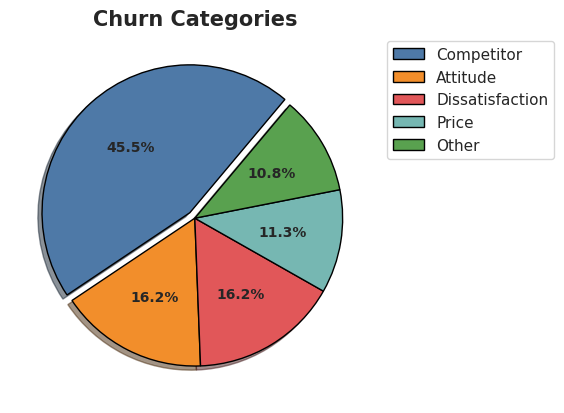

In [36]:
#pie diagram ploting of the churn categories
col = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']

# Your existing code with the updated 'col' variable
exp = [0.05, 0, 0, 0, 0]
plt.pie(x=reason['Churn Category'].value_counts().values, explode=exp, autopct="%1.1f%%", shadow=True, radius=1, colors=col,
        textprops={"fontsize": 10, "fontweight": 'bold'},
        wedgeprops={"linewidth": 1, "edgecolor": 'black'}, rotatelabels=False, startangle=50)
plt.legend(labels, bbox_to_anchor=(1, 1))
plt.title("Churn Categories", fontsize=15., fontweight='bold')
plt.show()


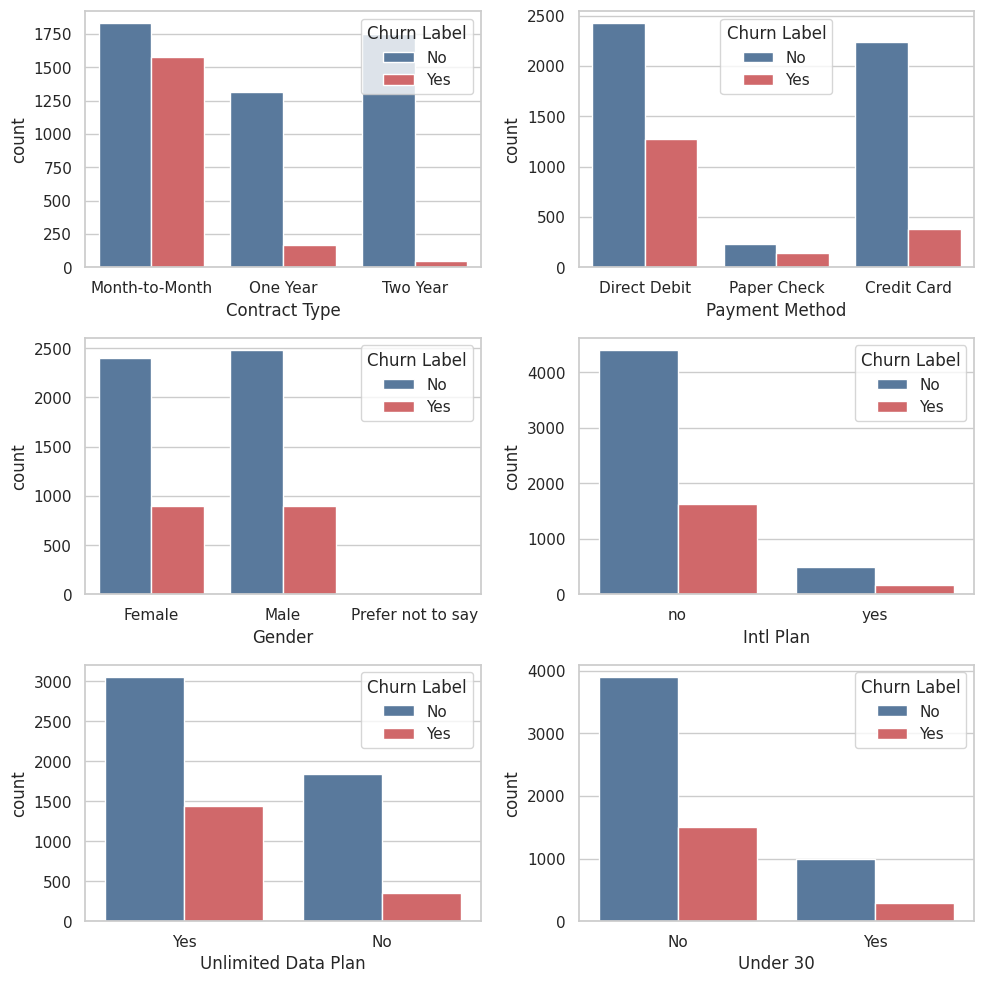

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color theme with light blue and light red HEX codes
col1 = '#4e79a7'  # Light Blue
col2 = '#e15759'   # Light Red

# Set the color palette to the defined colors
sns.set_palette([col1, col2])

# Adjust the size of the plot (smaller than the default)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))  # Smaller size

# Your existing code for plotting with the updated 'figsize' and color palette
sns.countplot(x="Contract Type", data=df, hue="Churn Label", ax=axes[0, 0])
sns.countplot(x="Payment Method", data=df, hue="Churn Label", ax=axes[0, 1])
sns.countplot(x="Gender", data=df, hue="Churn Label", ax=axes[1, 0])
sns.countplot(x="Intl Plan", data=df, hue="Churn Label", ax=axes[1, 1])
sns.countplot(x="Unlimited Data Plan", data=df, hue="Churn Label", ax=axes[2, 0])
sns.countplot(x="Under 30", data=df, hue='Churn Label', ax=axes[2, 1])

plt.tight_layout()
plt.show()



In [38]:
cor=df[['Account Length (in months)','Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins','Extra International Charges',
    'Customer Service Calls','Avg Monthly GB Download', 'Extra Data Charges', 'Age',
    'Number of Customers in Group', 'Monthly Charge', 'Total Charges']].corr()

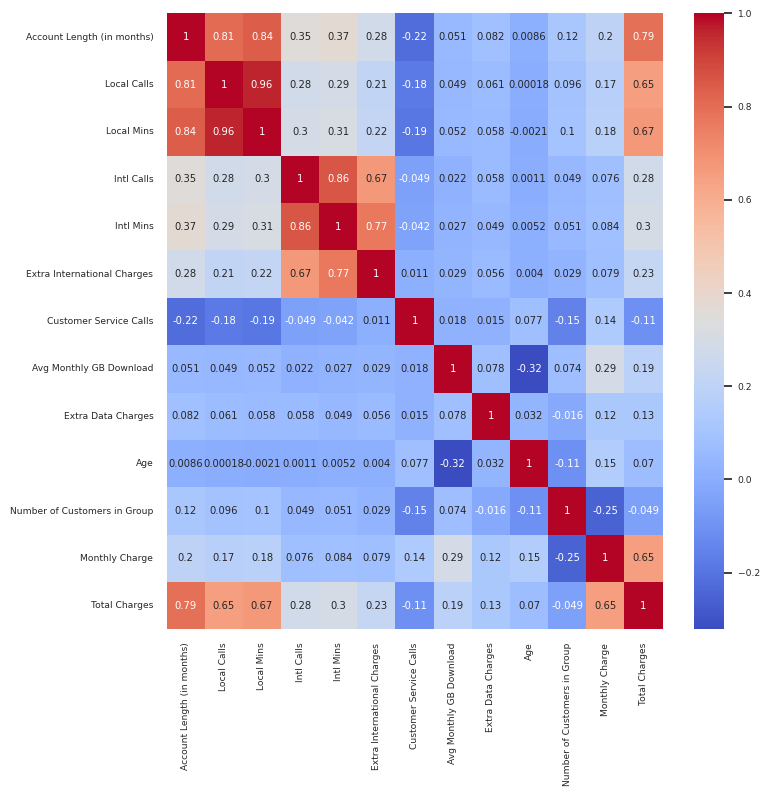

In [39]:
#ploting heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Set the font scale and style
sns.set(font_scale=0.6)  # Adjust to suit your needs
# Set the figure size
plt.figure(figsize=(8, 8))
# Create the heatmap
sns.heatmap(cor, annot=True, cmap='coolwarm')
# Show the plot
plt.show()


In [40]:
values=[df['Customer ID'].nunique(),df['Churn Label'].value_counts()[1],(df['Churn Label'].value_counts()[1]/df['Customer ID'].nunique()*100).round(2)]

In [41]:
metric=["Total Number of Customers","Total NUmber of Churned Customers","Rate of Churned Customers"]

In [42]:
summary=pd.DataFrame({'metric':metric,'Values':values},index=range(1,4))
summary

,metric,Values
1,Total Number of Customers,6687.00
2,Total NUmber of Churned Customers,1796.00
3,Rate of Churned Customers,26.86


In [43]:
df.groupby('Contract Type')['Avg Monthly GB Download'].mean().reset_index(name='Avg Monthly GB Download')

,Contract Type,Avg Monthly GB Download
0,Month-to-Month,7.154500
1,One Year,6.934415
2,Two Year,5.630495


<Figure size 1100x700 with 0 Axes>

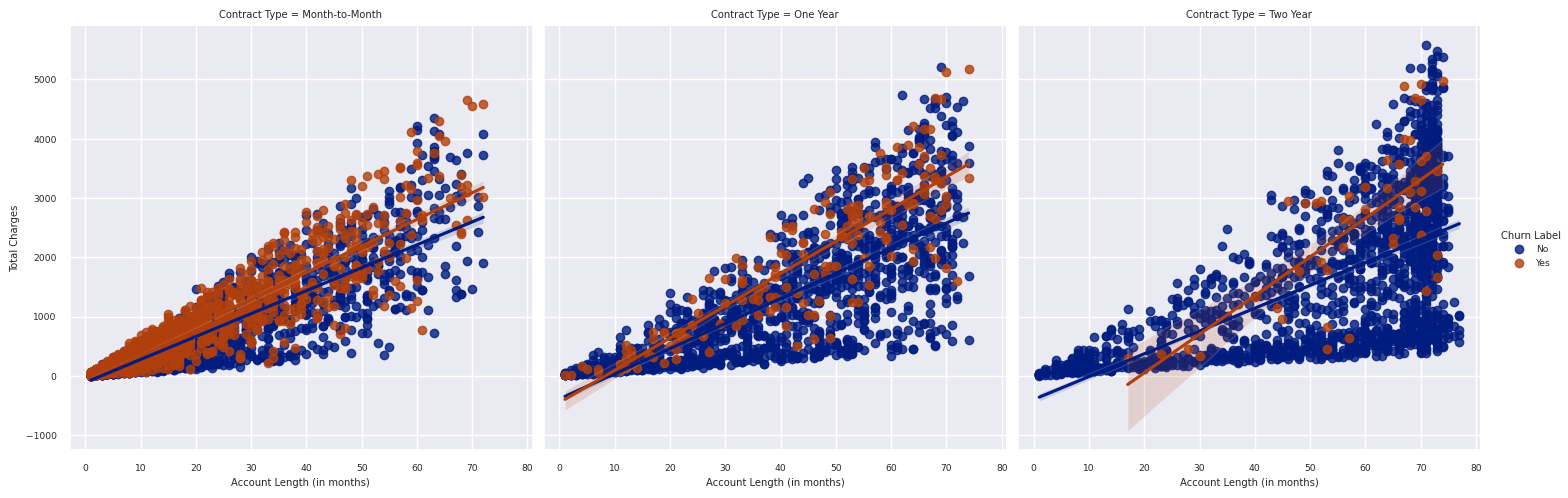

In [44]:
with sns.color_palette("dark"):
    plt.figure(figsize=(11,7))
    sns.lmplot(y='Total Charges',x='Account Length (in months)',data=df,hue='Churn Label',
           col='Contract Type')

In [45]:
print("Majority of Our Customers")
df['State'].value_counts().head().reset_index(name='No. of Customers')

Majority of Our Customers


,State,No. of Customers
0,WV,213
1,MN,168
2,NY,167
3,AL,161
4,OH,158


In [46]:
df[df['Churn Label']=='Yes']['State'].value_counts().reset_index(name='Customer Churned').head(5)

,State,Customer Churned
0,WV,57
1,OH,55
2,OR,48
3,MD,46
4,AL,46


#**Logistic Regression**

In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [48]:
column_selection=df[['Churn Label', 'Account Length (in months)',
       'Local Calls', 'Local Mins', 'Intl Calls', 'Intl Mins', 'Intl Active',
       'Intl Plan', 'Extra International Charges', 'Customer Service Calls',
       'Avg Monthly GB Download', 'Unlimited Data Plan', 'Extra Data Charges',
        'Gender', 'Age', 'Under 30', 'Senior', 'Group',
       'Number of Customers in Group', 'Device Protection & Online Backup',
       'Contract Type', 'Payment Method', 'Monthly Charge', 'Total Charges',
       'Churn Category','Churn Reason']]
column_selection.head(5)

,Churn Label,Account Length (in months),Local Calls,Local Mins,Intl Calls,Intl Mins,Intl Active,Intl Plan,Extra International Charges,Customer Service Calls,...,Senior,Group,Number of Customers in Group,Device Protection & Online Backup,Contract Type,Payment Method,Monthly Charge,Total Charges,Churn Category,Churn Reason
0,No,1,3,8.0,0.0,0.0,No,no,0.0,0,...,No,No,0,No,Month-to-Month,Direct Debit,10,10,NaN,NaN
1,No,33,179,431.3,0.0,0.0,No,no,0.0,0,...,No,No,0,Yes,One Year,Paper Check,21,703,NaN,NaN
2,No,44,82,217.6,0.0,0.0,No,yes,0.0,0,...,No,No,0,Yes,One Year,Direct Debit,23,1014,NaN,NaN
3,No,10,47,111.6,60.0,71.0,Yes,yes,0.0,0,...,No,No,0,No,Month-to-Month,Paper Check,17,177,NaN,NaN
4,No,62,184,621.2,310.0,694.4,Yes,yes,0.0,0,...,No,No,0,No,One Year,Direct Debit,28,1720,NaN,NaN


In [121]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [135]:
features=column_selection.drop('Churn Label',axis=1)
X=pd.get_dummies(features,drop_first=True)
y=df['Churn Label']

In [137]:
# Convert target variable to numerical format
y = df['Churn Label'].map({'No': 0, 'Yes': 1})

In [146]:

X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.8, random_state=42)

In [147]:
# Logistic Regression
logmodel = linear_model.LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, predictions))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3903
           1       0.70      0.57      0.63      1447

    accuracy                           0.82      5350
   macro avg       0.78      0.74      0.75      5350
weighted avg       0.81      0.82      0.81      5350



In [148]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train)
predictions = adaboost.predict(X_test)
print("AdaBoost:")
print(classification_report(y_test, predictions))

AdaBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3903
           1       0.97      0.95      0.96      1447

    accuracy                           0.98      5350
   macro avg       0.98      0.97      0.97      5350
weighted avg       0.98      0.98      0.98      5350



In [149]:
# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost.fit(X_train, y_train)
predictions = xgboost.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, predictions))


XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3903
           1       0.98      0.94      0.96      1447

    accuracy                           0.98      5350
   macro avg       0.98      0.97      0.97      5350
weighted avg       0.98      0.98      0.98      5350

